In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the CSV file
file_path = '/Users/siddhi/research_new/schas-2024-asthama-2.0/Individual_EDA/missing_data_summary2.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head()


,patient_id,total_data,start_date,end_date,M_total_ad,M_total_md,M_highest_md_chunk,M_lowest_md_chunk,A_total_ad,A_total_md,A_highest_md_chunk,A_lowest_md_chunk
0,SB-001,1336,2016-06-10,2020-02-05,1314,22,10,1,1283,53,13,1
1,SB-002,572,2014-11-21,2017-01-29,557,15,5,1,0,572,572,572
2,SB-003,1064,2017-05-01,2020-03-29,1015,49,5,1,993,71,6,1
3,SB-004,1823,2016-09-21,2021-09-17,1176,647,231,1,1147,676,231,1
4,SB-005,281,2016-04-21,2017-03-11,0,281,281,281,0,281,281,281


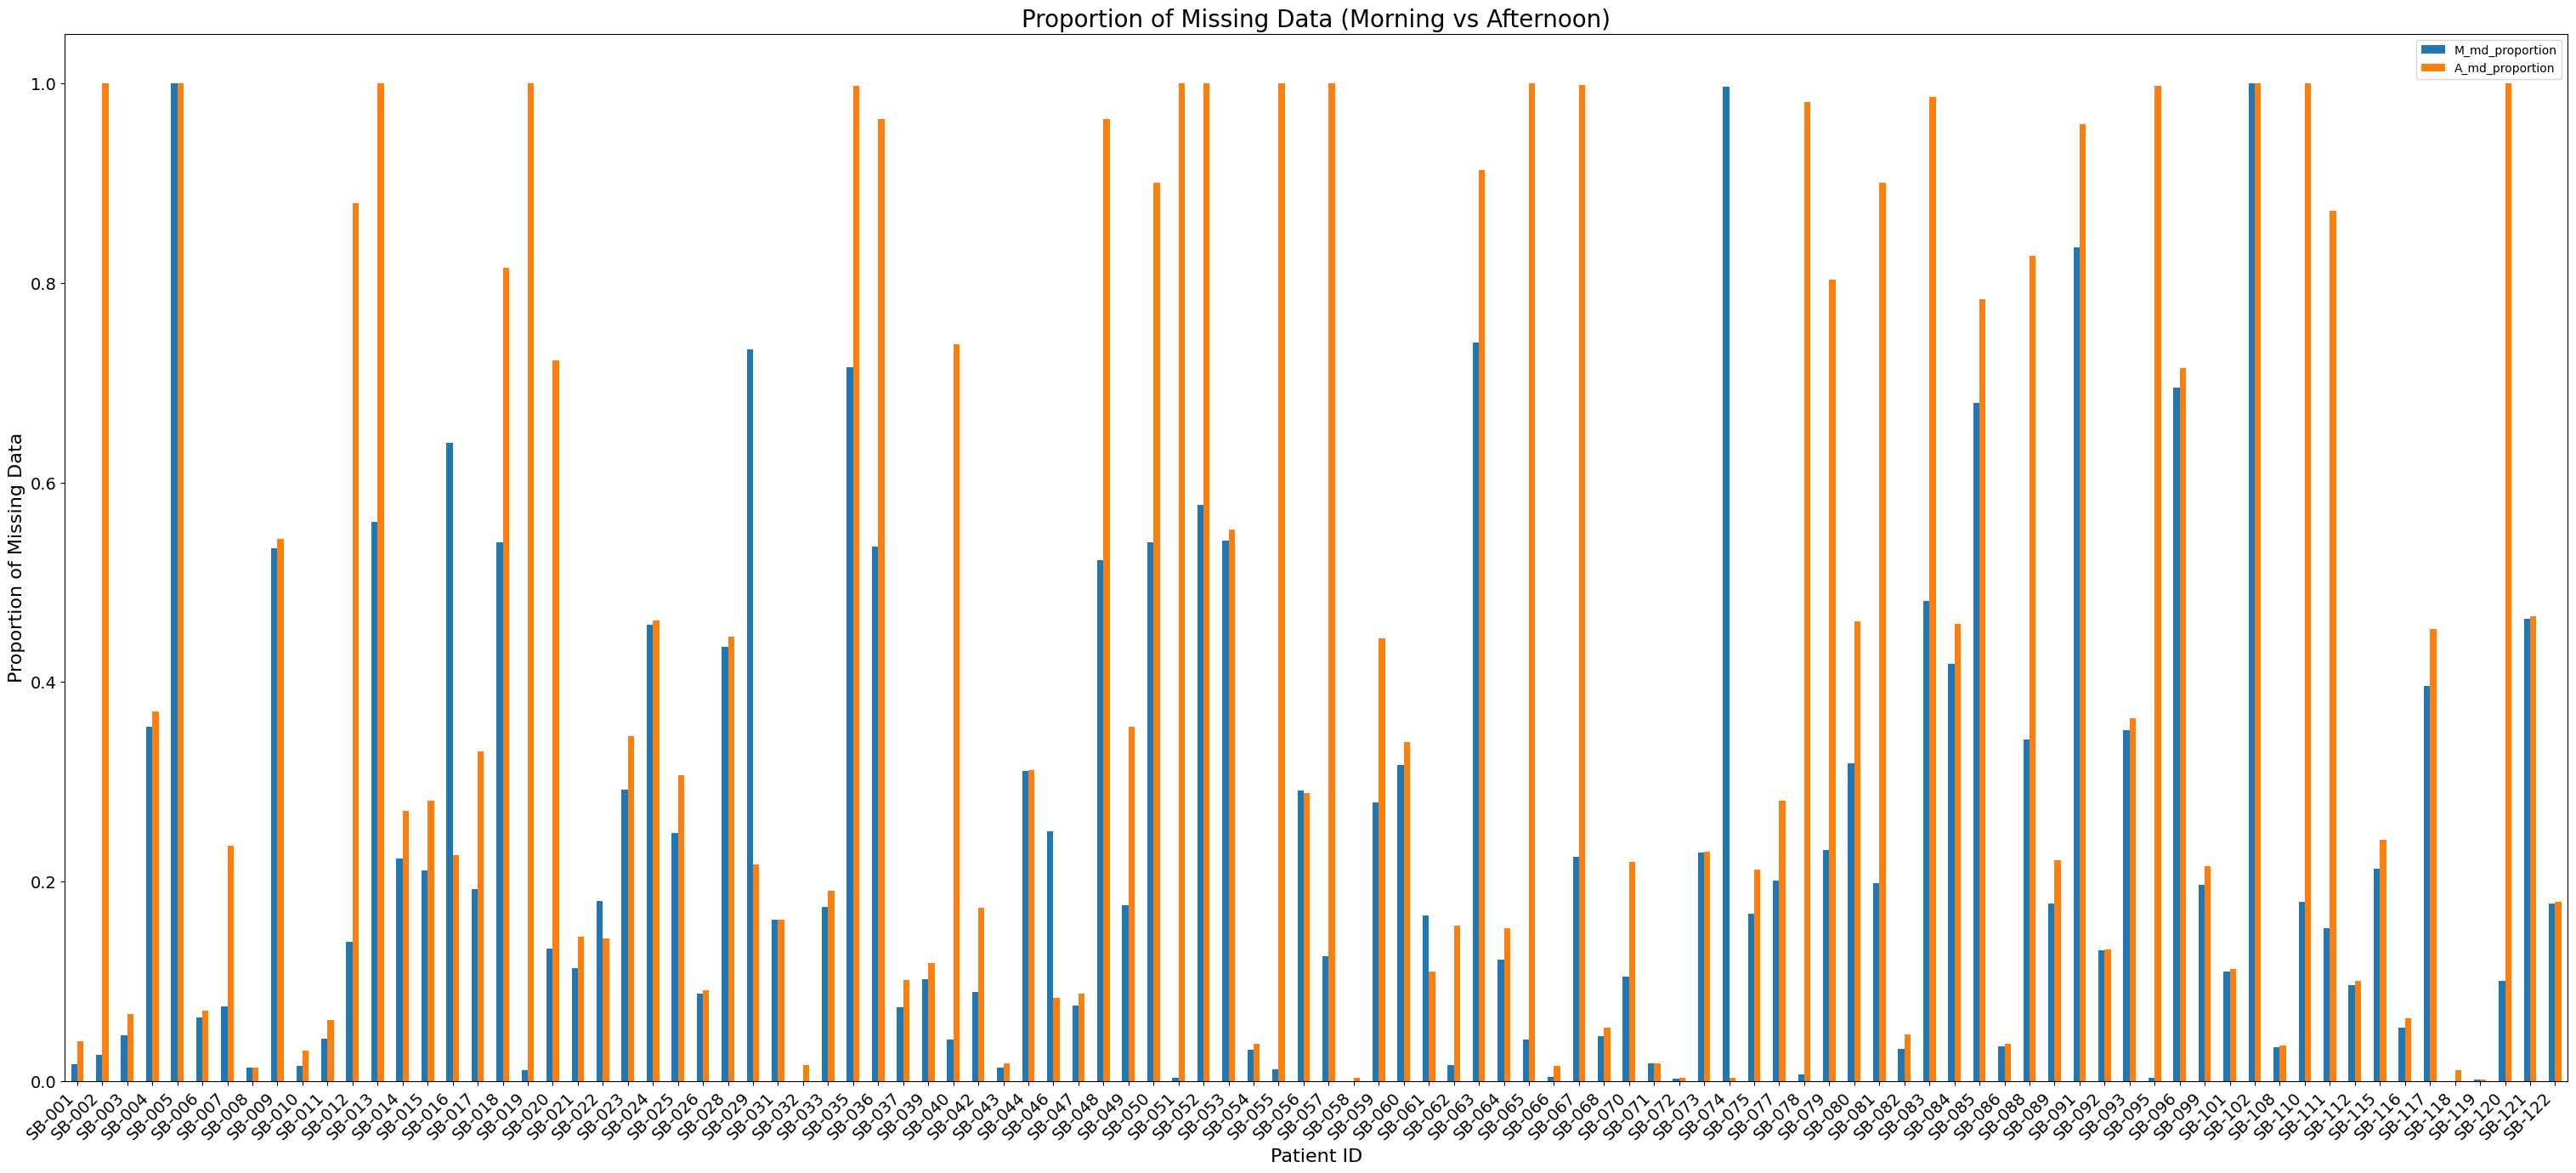

In [15]:
# Convert 'start_date' and 'end_date' to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Calculate the duration of data collection in days
df['collection_duration'] = (df['end_date'] - df['start_date']).dt.days

# 1. Missing Data Analysis

# Calculate the proportion of missing data for Morning and Afternoon
df['M_md_proportion'] = df['M_total_md'] / df['total_data']
df['A_md_proportion'] = df['A_total_md'] / df['total_data']

# Plot the proportion of missing data with increased figure size
df[['patient_id', 'M_md_proportion', 'A_md_proportion']].set_index('patient_id').plot(
    kind='bar',
    figsize=(38, 16)  # Increase the figure size here
)

plt.title('Proportion of Missing Data (Morning vs Afternoon)', fontsize=20)
plt.ylabel('Proportion of Missing Data', fontsize=16)
plt.xlabel('Patient ID', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate and adjust the font size of x-ticks
plt.yticks(fontsize=14)  # Adjust the font size of y-ticks
plt.show()

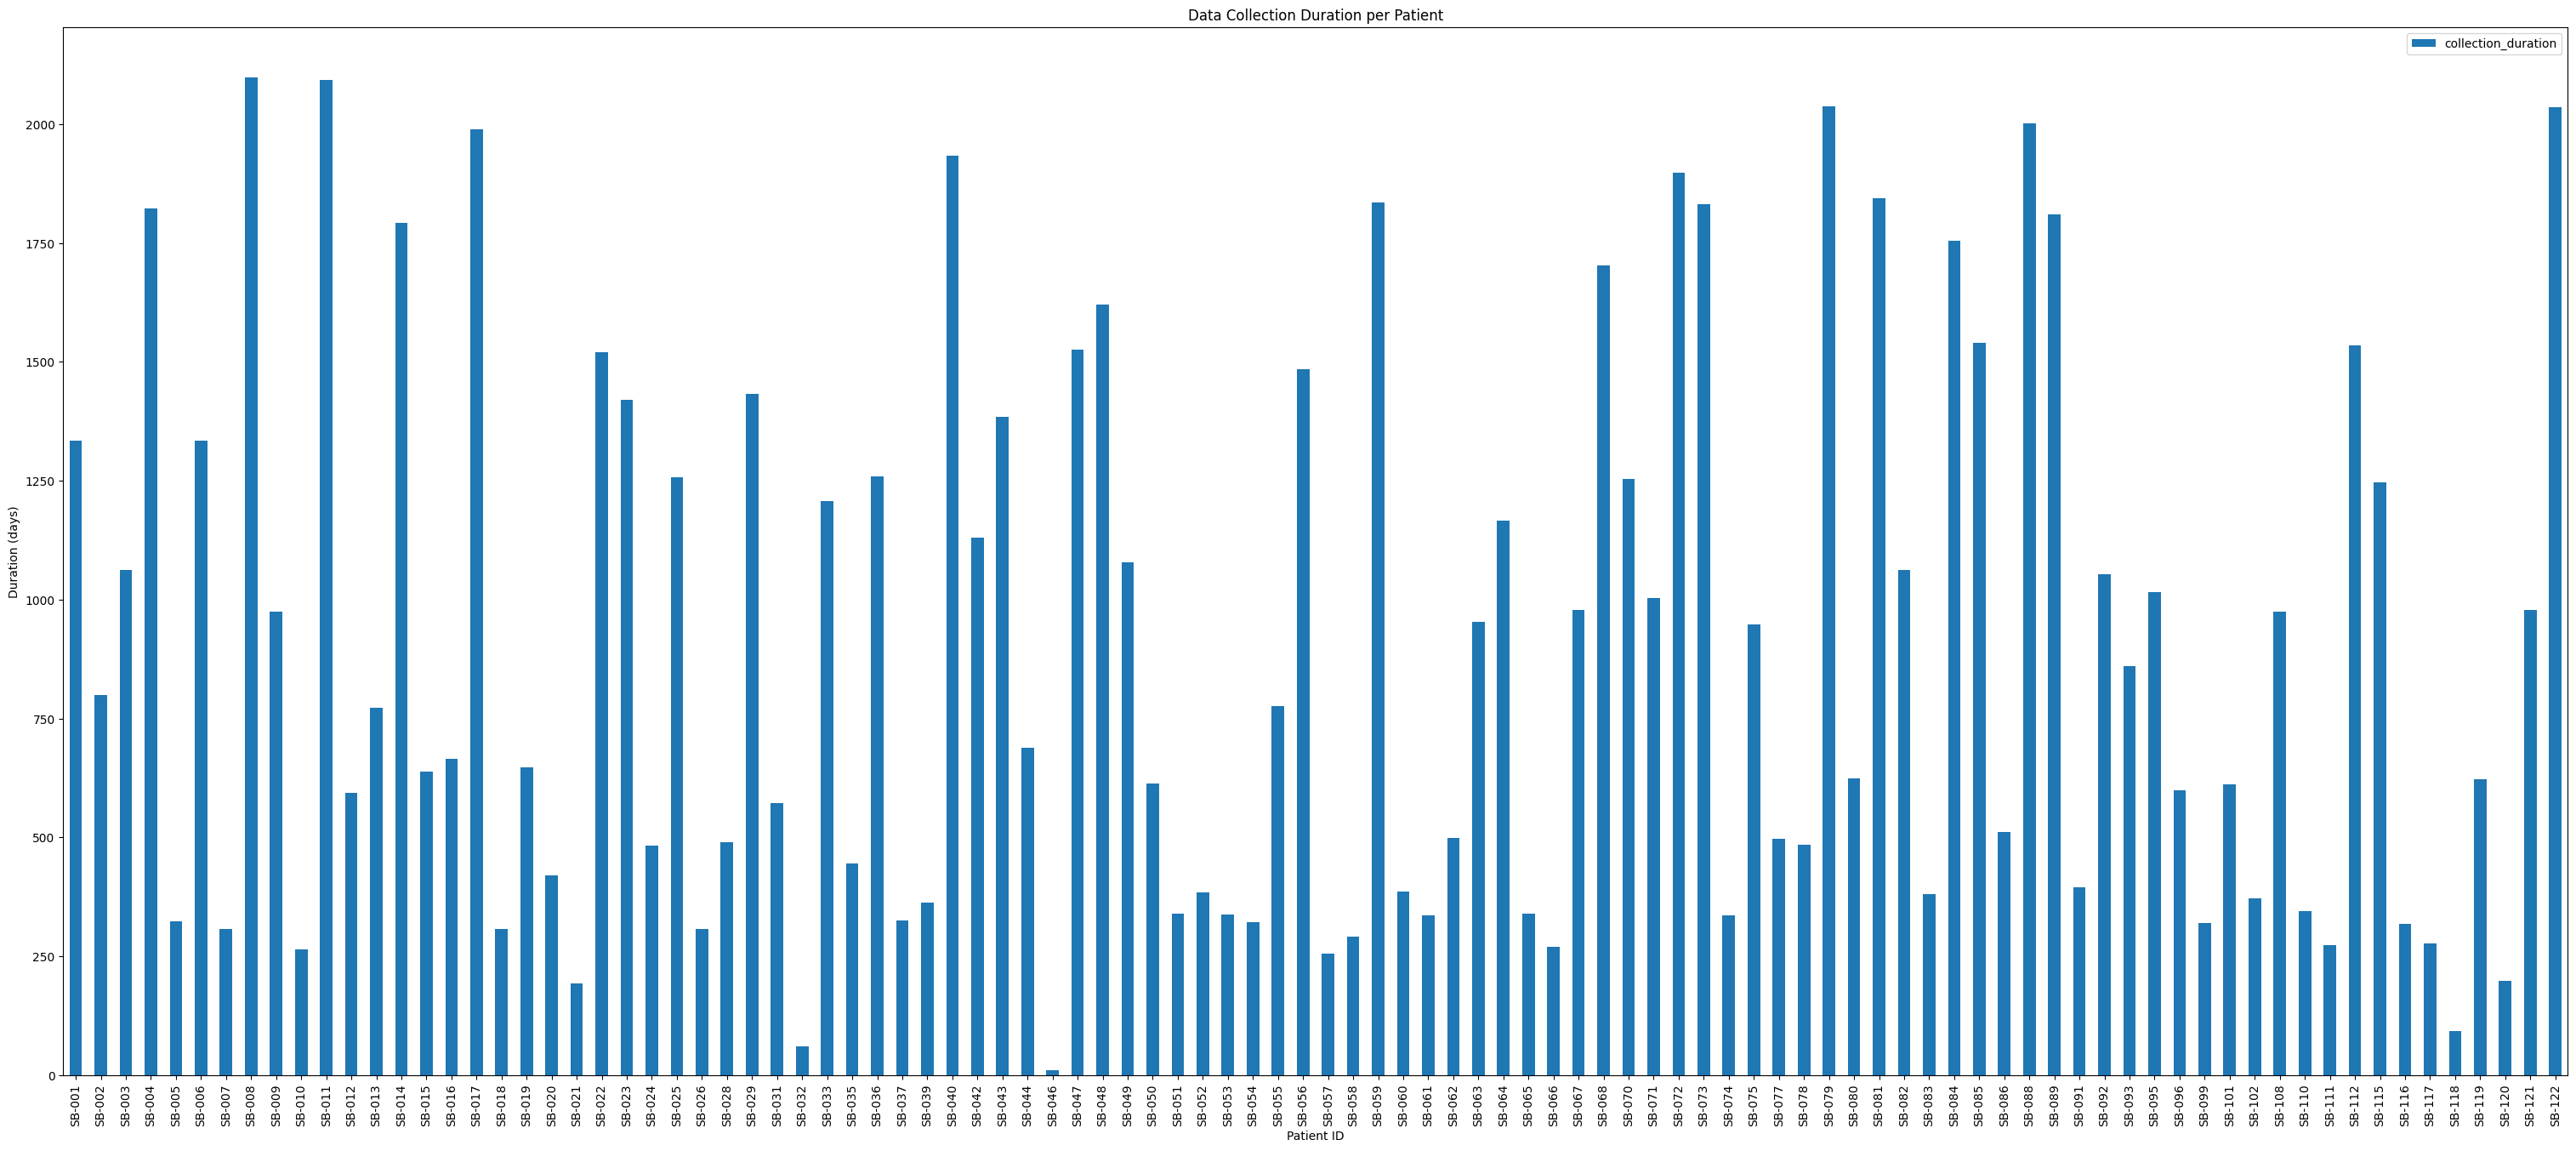

In [18]:
# Plot the duration of data collection for each patient
df[['patient_id', 'collection_duration']].set_index('patient_id').plot(
    kind='bar',
    figsize=(38, 16)  # Increase the figure size here
)

plt.title('Data Collection Duration per Patient')
plt.ylabel('Duration (days)')
plt.xlabel('Patient ID')
plt.show()